<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-11/Brain_sample_EIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install impedance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 659.3 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 811, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 811 (delta 63), reused 20 (delta 15), pack-reused 710
Receiving objects: 100% (811/811), 39.88 MiB | 11.37 MiB/s, done.
Resolving deltas: 100% (432/432), done.
Updating files: 100% (109/109), done.


'/content'

# EIS on as-grown B131a with gold deposited

In [ ]:
%cd "/content/gator/data/07-11/"

/content/gator/data/07-11


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

### High to low

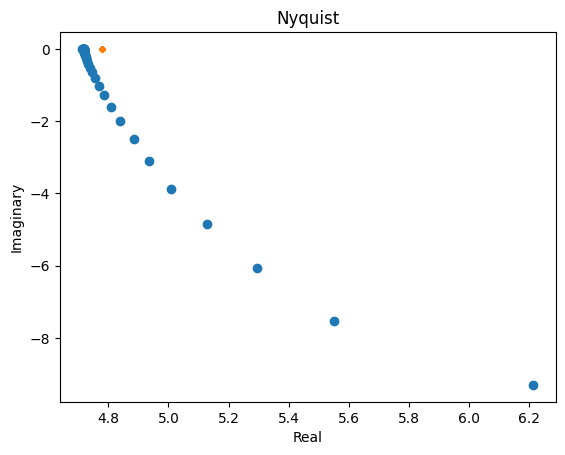

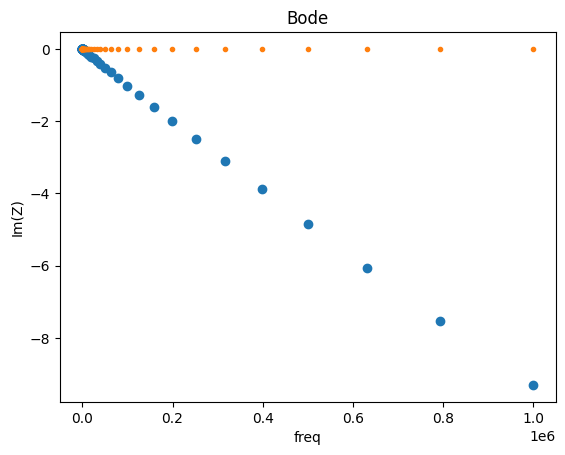

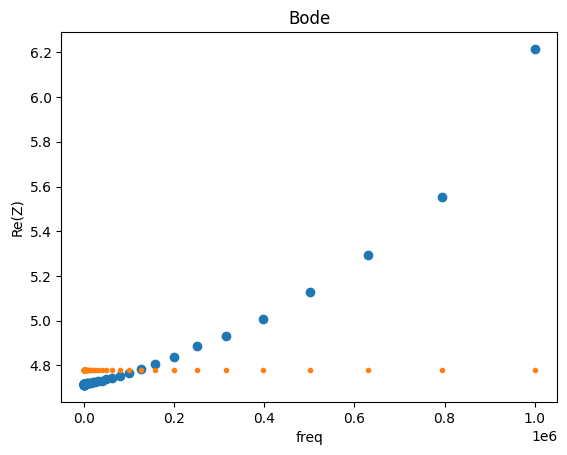

In [ ]:
freqs, Z = preprocessing.readZPlot('0711_hl_01.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 4.78e+00  (+/- 1.70e-01) [Ohm]
     W0 = 2.71e-13  (+/- 3.63e-01) [Ohm sec^-1/2]
     C0 = 3.08e-30  (+/- 6.01e-09) [F]



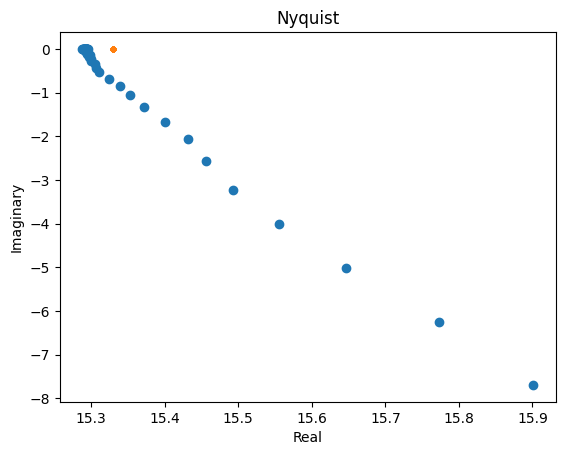

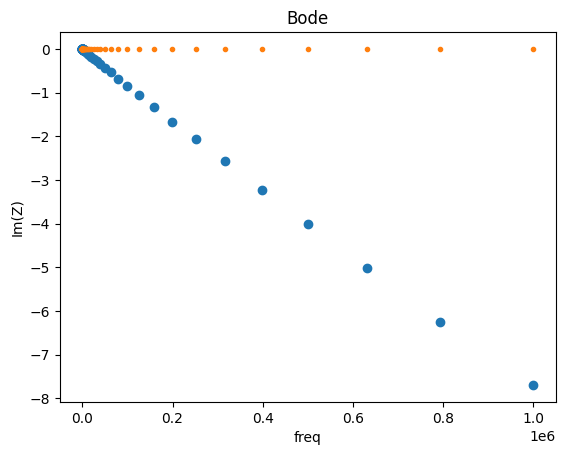

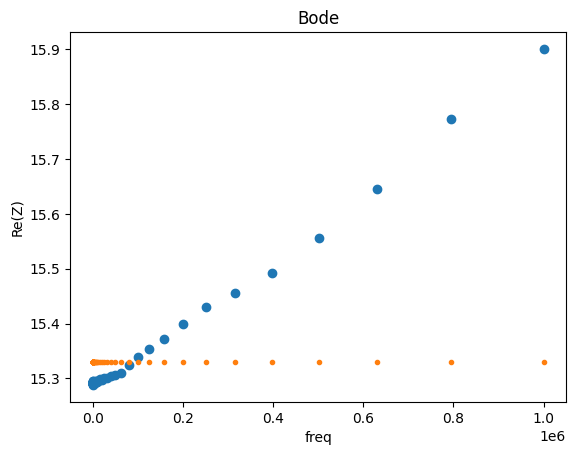

In [ ]:
freqs, Z = preprocessing.readZPlot('0711_hl_02.z')
freqs, Z = np.delete(freqs, 32), np.delete(Z, 32) # remove 1 noise point (argmin(Z.imag))

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 3.08e+04  (+/- 8.49e+01) [Ohm]
     W0 = 3.36e+02  (+/- 3.59e+02) [Ohm sec^-1/2]
     C0 = 1.03e-10  (+/- 5.49e-11) [F]



On both high to low and low to high we can see a semi-circle. The model fits perfectly